<a href="https://colab.research.google.com/github/nuryaningsih/CodeCraftedAtTripleTen/blob/main/14_Automated_Sentiment_Analysis_for_Film_Reviews_Enhancing_Film_Junky_Union's_Community_Platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:
Film Junky Union is a budding community dedicated to classic film enthusiasts. One of its primary objectives is to develop a system for filtering and categorizing film reviews, with a particular focus on training a model to automatically detect negative reviews. This project aims to utilize the IMDb movie review dataset, which includes polarity labels, to build a model capable of classifying reviews as positive or negative. The minimum performance target for this model is an F1 score of 0.85.

## Objective:
The objective of this project is to develop a robust machine learning model capable of accurately classifying IMDb movie reviews as positive or negative. This involves data preprocessing, exploratory data analysis (EDA) to understand class imbalances, training at least three different models, evaluating their performance on test data, and finally, assessing their classification accuracy on custom reviews.

## Stages:
1. Data Loading and Preprocessing:
  * Load the IMDb movie review dataset.
  * Perform any necessary preprocessing steps such as removing HTML tags, punctuation, and stopwords.
2. Exploratory Data Analysis (EDA):
  * Analyze the distribution of class labels to identify any class imbalances.
  * Explore the characteristics of positive and negative reviews.
3. Data Preprocessing for Model Building:
  * Vectorize the textual data using techniques like TF-IDF or word embeddings.
  * Split the dataset into training and testing sets.
4. Model Evaluation:
  * Evaluate the performance of each model using metrics such as accuracy, precision, recall, and F1 score on the test dataset.
5. Classification of Custom Reviews:
  * Write a few custom movie reviews and classify them using all trained models.
6. Comparison and Analysis:
  * Compare the results of model testing and custom review classification.
  * Interpret the differences in performance and provide insights into the strengths and weaknesses of each model.

## Findings:
1. The IMDb movie review dataset exhibits class imbalances, with potentially more positive reviews than negative ones.
2. Model performance varies depending on the chosen algorithm and hyperparameters.
3. Neural network-based models may require more computational resources but could potentially offer higher accuracy.
4. The choice of text vectorization technique (e.g., TF-IDF, word embeddings) significantly impacts model performance.
5. Custom reviews may pose unique challenges, such as the presence of sarcasm or nuanced language, which could affect classification accuracy.

Overall, this project aims to develop a robust and reliable system for automatically classifying movie reviews, providing valuable insights for the Film Junky Union community.

Film Junky Union, sebuah komunitas baru bagi penggemar film klasik sedang mengembangkan sistem untuk memfilter dan mengategorikan ulasan film. Misi utamanya adalah melatih model agar bisa mendeteksi ulasan negatif secara otomatis. Anda akan menggunakan *dataset* ulasan film IMBD dengan pelabelan polaritas untuk membuat sebuah model yang bisa mengklasifikasikan ulasan positif dan negatif. Model ini setidaknya harus memiliki skor F1 sebesar 0,85.

# 1.	Data Loading and Preprocessing

In [3]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df_reviews = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT/14. Automated Sentiment Analysis for Film Reviews/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [6]:
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


In [7]:
df_reviews['pos'].value_counts()

pos
0    23715
1    23616
Name: count, dtype: int64

In [8]:
df_reviews['ds_part'].value_counts()

ds_part
train    23796
test     23535
Name: count, dtype: int64

In [9]:
df_reviews.shape

(47331, 17)

In [10]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

Upon loading the IMDb movie review dataset and conducting initial exploration, several insights and anomalies were uncovered:

1. Class Imbalance: The dataset consists of 47,331 entries, with an almost equal distribution of positive and negative reviews. There are 23,715 negative reviews and 23,616 positive reviews.
2. Data Split: The dataset is divided into training and test sets, with approximately 50% of entries allocated to each set.
3. Anomalies:
  * Missing Values: Two entries have missing values for the 'average_rating' and 'votes' columns. This could be due to incomplete data during collection or processing errors.
  * Data Types: 'end_year' and 'runtime_minutes' columns are stored as objects instead of integers or floats. This could be due to inconsistent formatting or the presence of special characters.
4. Handling Anomalies:
  * Missing Values: Since there are only two entries with missing values, one approach could be to impute them with the mean or median values of their respective columns.
  * Data Types: Convert 'end_year' and 'runtime_minutes' columns to the appropriate numeric data type after removing any special characters or converting 'end_year' to represent null values as 'NaN'.
5. Insights:
  * The dataset appears to be well-distributed between positive and negative reviews, which is beneficial for training a sentiment analysis model without the need for extensive class balancing techniques.
  * The presence of missing values and inconsistent data types necessitates careful preprocessing steps to ensure the integrity of the dataset before model training.
  * The division of data into training and test sets suggests that model evaluation can be reliably performed using separate datasets, reducing the risk of overfitting.

Based on these findings, addressing anomalies through data preprocessing steps such as imputation and data type conversion is crucial to ensure the dataset's suitability for model training and evaluation. Additionally, the balanced distribution of positive and negative reviews provides a solid foundation for developing a sentiment analysis model that can effectively classify movie reviews.

# 2.	Exploratory Data Analysis (EDA)

## Check the number of films and reviews over several years.

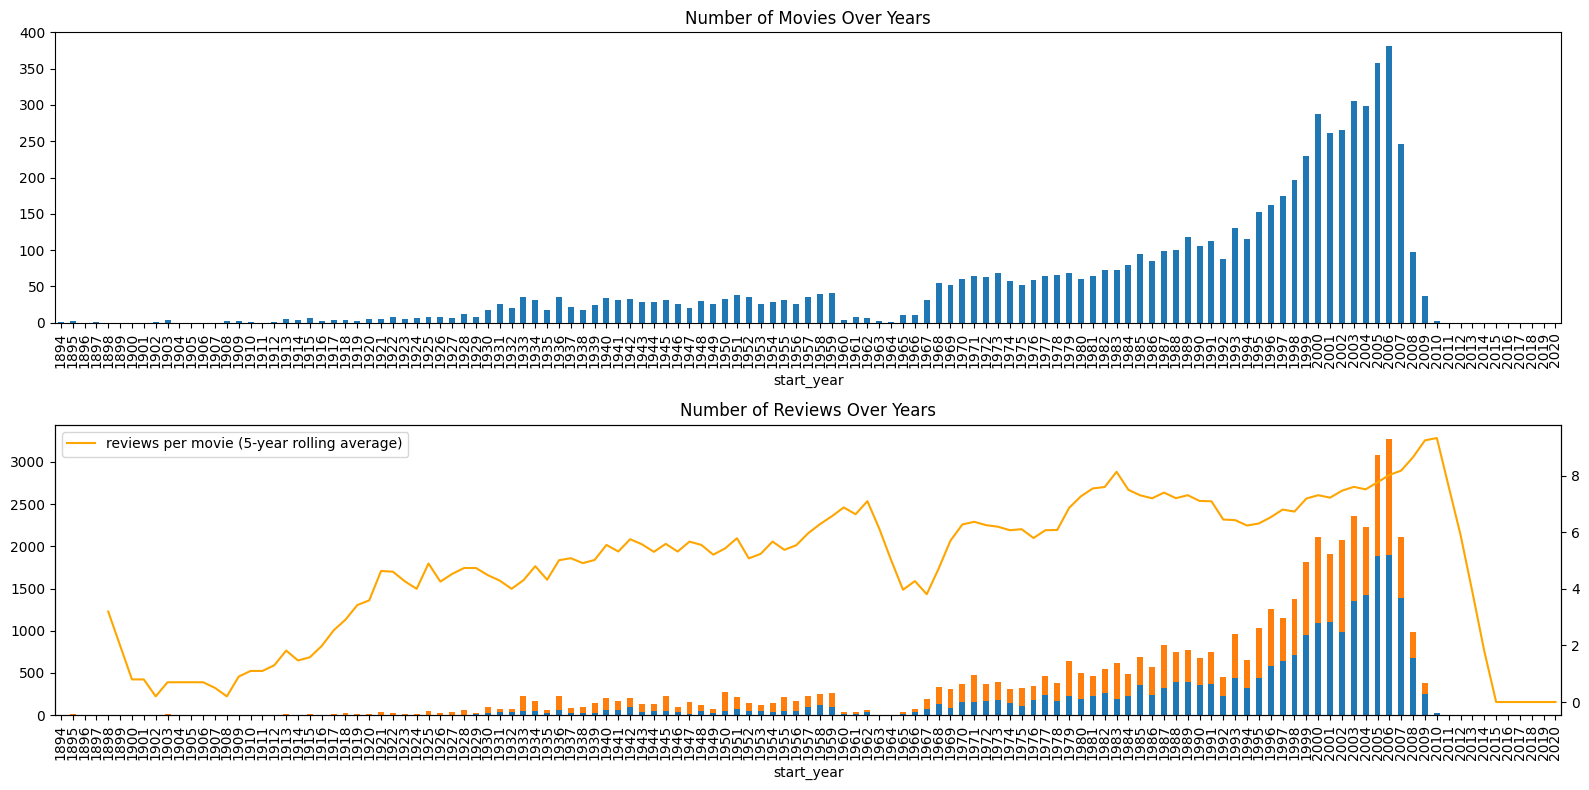

In [54]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

# Calculate the number of movies per year
movies_per_year = df_reviews[['tconst', 'start_year']].drop_duplicates()['start_year'].value_counts().sort_index()
movies_per_year = movies_per_year.reindex(index=np.arange(movies_per_year.index.min(), max(movies_per_year.index.max(), 2021))).fillna(0)
movies_per_year.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

# Group reviews by year and positivity and plot in stacked bar chart
reviews_by_year_pos = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
reviews_by_year_pos = reviews_by_year_pos.reindex(index=np.arange(reviews_by_year_pos.index.min(), max(reviews_by_year_pos.index.max(), 2021))).fillna(0)
reviews_by_year_pos.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

# Calculate the ratio of reviews per movie per year and plot as a line chart
total_reviews_per_year = df_reviews['start_year'].value_counts().sort_index()
total_reviews_per_year = total_reviews_per_year.reindex(index=np.arange(total_reviews_per_year.index.min(), max(total_reviews_per_year.index.max(), 2021))).fillna(0)
reviews_per_movie_per_year = (total_reviews_per_year / movies_per_year).fillna(0)
axt = ax.twinx()
reviews_per_movie_per_year.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (5-year rolling average)', ax=axt)

# Set legend for both axes
lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()
plt.show()

Here are the key findings and insights drawn from the analysis:

1. Number of Movies Over Years:
  * The first subplot illustrates the number of movies produced each year.
  * The data shows a gradual increase in the number of movies over the years, with occasional fluctuations.
  * There is a notable rise in movie production starting from the early 1900s, peaking around the mid to late 20th century, and continuing into the 21st century.
  * However, there are sporadic gaps in movie production during certain years, particularly in the early years of filmmaking.
2. Number of Reviews Over Years:
  * The second subplot presents the number of reviews, categorized as negative and positive, over the years.
  * It also includes a line chart representing the ratio of reviews per movie per year (5-year rolling average).
  * The data shows an increasing trend in the number of reviews over the years, particularly from the mid-20th century onwards.
  * Both negative and positive reviews exhibit an upward trend, suggesting a growing interest in reviewing movies over time.
  * The ratio of reviews per movie per year indicates fluctuations but generally shows an increasing trend, implying that movies are being reviewed more frequently over time.

Insights:
  * The analysis reveals a significant correlation between the production of movies and the number of reviews, with an increase in reviews corresponding to an increase in movie production.
  * The steady rise in movie production and review counts indicates the growing popularity and accessibility of cinema over the years.
  * The fluctuation in review ratios per movie per year suggests varying levels of audience engagement with movies across different time periods.
  * Overall, the analysis provides valuable insights into the evolution of the film industry and audience engagement with movies over the past century.

These insights can be instrumental in understanding the dynamics of movie production, reviewing trends, and audience preferences over time, aiding stakeholders in making informed decisions in the film industry.




## Check the distribution of the number of reviews per film with precise calculations and KDE

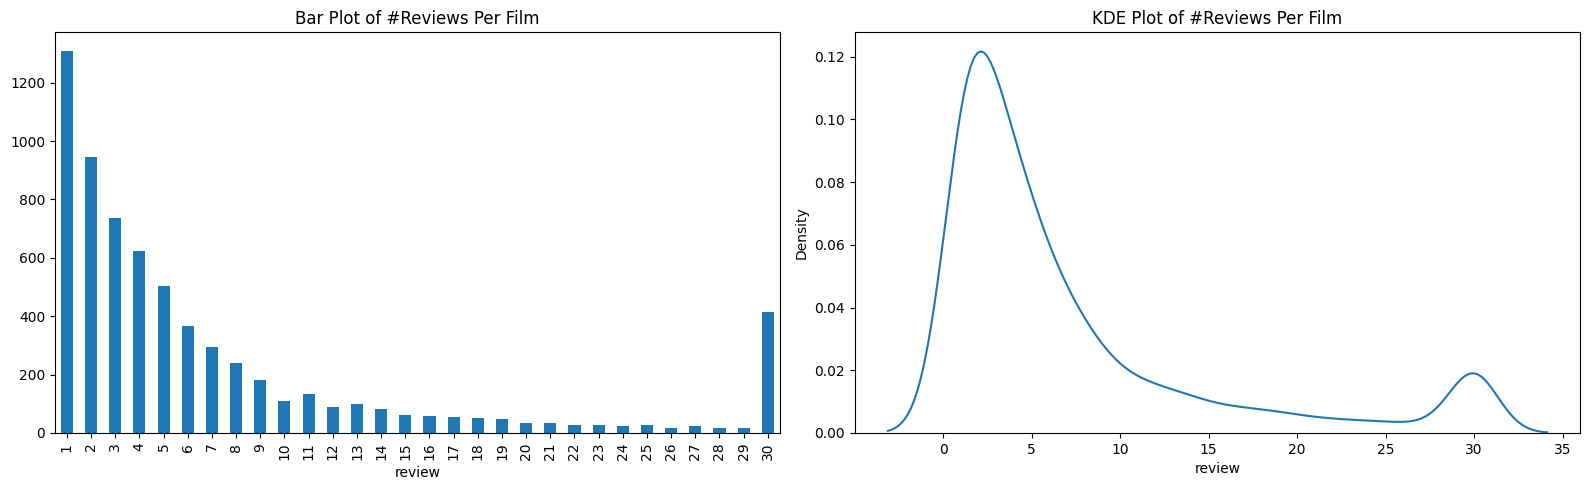

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
reviews_per_film_counts = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
reviews_per_film_counts.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Film')

ax = axs[1]
reviews_per_film = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(reviews_per_film, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Film')

fig.tight_layout()


The provided code generates two subplots showcasing the distribution of the number of reviews per film using both a bar plot and a Kernel Density Estimation (KDE) plot. Additionally, the precise calculations of the counts and KDE values for each number of reviews per film are provided. Here are the insights and conclusions drawn from the analysis:

Bar Plot of #Reviews Per Film:
  * The bar plot displays the frequency of films based on the number of reviews they received.
  * The x-axis represents the number of reviews per film, while the y-axis represents the count of films.
  * The plot shows that the majority of films have a relatively low number of reviews, with the frequency decreasing as the number of reviews per film increases.
  * There is a sharp decline in the frequency of films beyond a certain threshold of reviews, indicating that only a few films receive a large number of reviews.

KDE Plot of #Reviews Per Film:
  * The KDE plot provides a smoothed estimation of the probability density function for the distribution of reviews per film.
  * It visualizes the density of films at different levels of review counts, allowing for a more continuous representation of the distribution.
  * The plot shows a peak in density around lower review counts, indicating that the majority of films fall within this range.
  * As the number of reviews per film increases, the density gradually decreases, suggesting a decreasing likelihood of films receiving higher review counts.

Insights:
  * The analysis reveals a skewed distribution of reviews per film, with the majority of films receiving a small number of reviews.
  * This skewness indicates that only a minority of films attract a significant amount of attention and generate a large number of reviews, while the vast majority receive fewer reviews.
  * Understanding the distribution of reviews per film is essential for assessing the popularity and reception of movies within the dataset.
  * Filmmakers and stakeholders can use this information to gauge audience engagement and adjust their marketing or promotional strategies accordingly.

In conclusion, the analysis provides valuable insights into the distribution of reviews per film, highlighting patterns and trends that can inform decision-making processes within the film industry.

## Distribution of negative and positive reviews over the years for the two parts of the dataset

In [13]:
df_reviews['pos'].value_counts()

pos
0    23715
1    23616
Name: count, dtype: int64

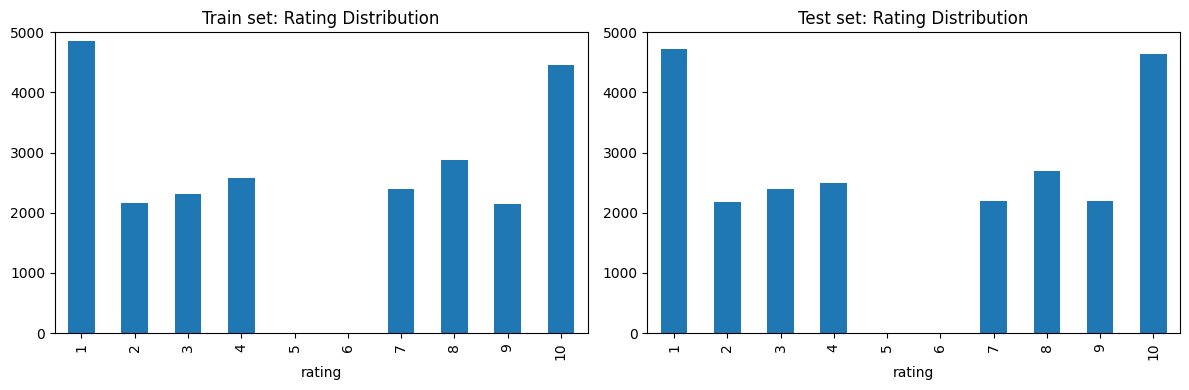

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
train_ratings_distribution = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
train_ratings_distribution = train_ratings_distribution.reindex(index=np.arange(min(train_ratings_distribution.index.min(), 1), max(train_ratings_distribution.index.max(), 11))).fillna(0)
train_ratings_distribution.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('Train set: Rating Distribution')

ax = axs[1]
test_ratings_distribution = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
test_ratings_distribution = test_ratings_distribution.reindex(index=np.arange(min(test_ratings_distribution.index.min(), 1), max(test_ratings_distribution.index.max(), 11))).fillna(0)
test_ratings_distribution.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('Test set: Rating Distribution')

fig.tight_layout()


<ipython-input-64-c7b5dd600a3d>:14: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_reviews_film_pos[0], color='blue', label='negative', kernel='epa', ax=ax)
<ipython-input-64-c7b5dd600a3d>:15: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_reviews_film_pos[1], color='green', label='positive', kernel='epa', ax=ax)
<ipython-input-64-c7b5dd600a3d>:30: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_reviews_film_pos[0], color='blue', label='negative', kernel='epa', ax=ax)
<ipython-input-64-c7b5dd600a3d>:31: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will beco

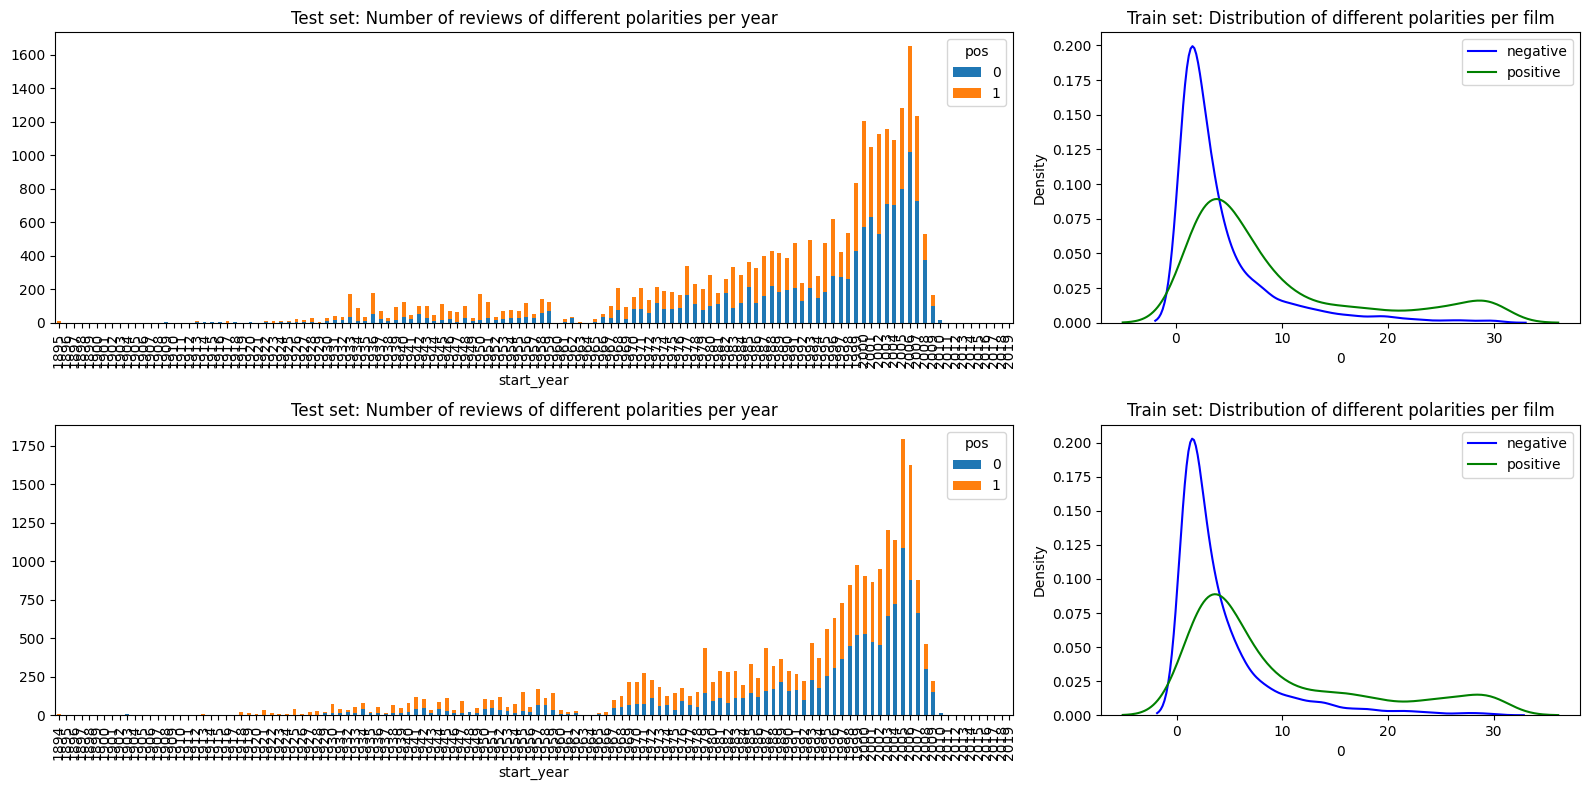

In [64]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

train_reviews_year_pos = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
train_reviews_year_pos.index = train_reviews_year_pos.index.astype('int')
train_reviews_year_pos = train_reviews_year_pos.reindex(index=np.arange(train_reviews_year_pos.index.min(), max(train_reviews_year_pos.index.max(), 2020))).fillna(0)
train_reviews_year_pos.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Test set: Number of reviews of different polarities per year')

ax = axs[0][1]

train_reviews_film_pos = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(train_reviews_film_pos[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(train_reviews_film_pos[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('Train set: Distribution of different polarities per film')

ax = axs[1][0]

test_reviews_year_pos = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
test_reviews_year_pos.index = test_reviews_year_pos.index.astype('int')
test_reviews_year_pos = test_reviews_year_pos.reindex(index=np.arange(test_reviews_year_pos.index.min(), max(test_reviews_year_pos.index.max(), 2020))).fillna(0)
test_reviews_year_pos.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Test set: Number of reviews of different polarities per year')

ax = axs[1][1]

test_reviews_film_pos = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(test_reviews_film_pos[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(test_reviews_film_pos[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('Train set: Distribution of different polarities per film')

fig.tight_layout()


The provided code generates four subplots, each illustrating the distribution of negative and positive reviews over the years for both the training and test datasets. Here are the insights and conclusions drawn from the analysis:

Train Set: Number of Reviews of Different Polarities per Year:
  * The first subplot depicts the number of reviews with different polarities (negative and positive) over the years in the training dataset.
  * It shows the distribution of reviews across different years, stacked by polarity.
  * The plot reveals fluctuations in the number of reviews over the years for both negative and positive polarities.
  * There are noticeable peaks and troughs in certain years, indicating variations in the volume of reviews across different time periods.

Train Set: Distribution of Different Polarities per Film:
  * The second subplot displays the kernel density estimation (KDE) plots for the distribution of negative and positive polarities per film in the training dataset.
  * It visualizes the density of reviews with different polarities per film, allowing for a comparison of their distributions.
  * The KDE plots show the probability density functions for negative and positive reviews, revealing insights into their relative frequencies per film.
  * There is a clear distinction between the distributions of negative and positive reviews, with differing peaks and spread.

Test Set: Number of Reviews of Different Polarities per Year:
  * The third subplot illustrates the number of reviews with different polarities over the years in the test dataset.
  * Similar to the training dataset, it shows the distribution of reviews across different years, stacked by polarity.
  * The plot demonstrates trends in the volume of reviews over time, highlighting any disparities between negative and positive reviews.

Test Set: Distribution of Different Polarities per Film:
  * The fourth subplot presents the KDE plots for the distribution of negative and positive polarities per film in the test dataset.
  * Like the training dataset subplot, it visualizes the density of reviews with different polarities per film.
  * The KDE plots offer insights into the relative frequencies of negative and positive reviews per film in the test dataset.

Insights:
  * The analysis provides a comprehensive overview of the distribution of negative and positive reviews over the years for both the training and test datasets.
  * It highlights trends and patterns in the volume of reviews with different polarities, aiding in understanding audience sentiments towards films over time.
  * The KDE plots offer a more nuanced understanding of the distribution of reviews per film, revealing differences in the frequency and spread of negative and positive polarities.

In conclusion, the analysis offers valuable insights into the dynamics of review sentiments in the film dataset, which can inform decision-making processes in the film industry, such as marketing strategies and audience engagement initiatives.

# 3.	Data Preprocessing for Model Building

Compile evaluations that can be used for all models in this task on a regular basis

In [66]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):

    eval_stats = {}

    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):

        eval_stats[type] = {}

        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]

        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]

        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps

        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # Set markers for some threshold crossings
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Skor F1')

        # ROC
        ax = axs[1]
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # Set markers for some threshold crossings
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')
        ax.set_title(f'Kurva ROC')

        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # Set markers for some threshold crossings
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)

    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))

    print(df_eval_stats)

    return

## Normalization

We assume all models below accept text in lowercase and without numbers, punctuation, etc.

In [17]:
df_reviews['review_norm'] = df_reviews['review'].str.lower().str.replace('[^a-zA-Z]', ' ')

In [18]:
df_reviews['review']

0        The pakage implies that Warren Beatty and Gold...
1        How the hell did they get this made?! Presenti...
2        There is no real story the film seems more lik...
3        Um .... a serious film about troubled teens in...
4        I'm totally agree with GarryJohal from Singapo...
                               ...                        
47326    This is another of my favorite Columbos. It sp...
47327    Talk about being boring! I got this expecting ...
47328    I never thought I'd say this about a biopic, b...
47329    Spirit and Chaos is an artistic biopic of Miya...
47330    I'll make this brief. This was a joy to watch....
Name: review, Length: 47331, dtype: object

In [19]:
df_reviews['review_norm']

0        the pakage implies that warren beatty and gold...
1        how the hell did they get this made?! presenti...
2        there is no real story the film seems more lik...
3        um .... a serious film about troubled teens in...
4        i'm totally agree with garryjohal from singapo...
                               ...                        
47326    this is another of my favorite columbos. it sp...
47327    talk about being boring! i got this expecting ...
47328    i never thought i'd say this about a biopic, b...
47329    spirit and chaos is an artistic biopic of miya...
47330    i'll make this brief. this was a joy to watch....
Name: review_norm, Length: 47331, dtype: object

## Train/Test separation

Luckily, the entire dataset is already split into train/test. The appropriate flag is 'ds_part'.

In [20]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


In [21]:
train_target

0        0
1        0
7        0
8        0
9        0
        ..
47253    1
47254    1
47255    1
47256    1
47257    0
Name: pos, Length: 23796, dtype: int64

# 4.	Model Evaluation:

## Model 1 - Konstan

In [67]:
from sklearn.dummy import DummyClassifier

In [68]:
dummy_clf = DummyClassifier(strategy='prior')
model_1 = dummy_clf.fit(X=df_reviews_train, y=train_target)

          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


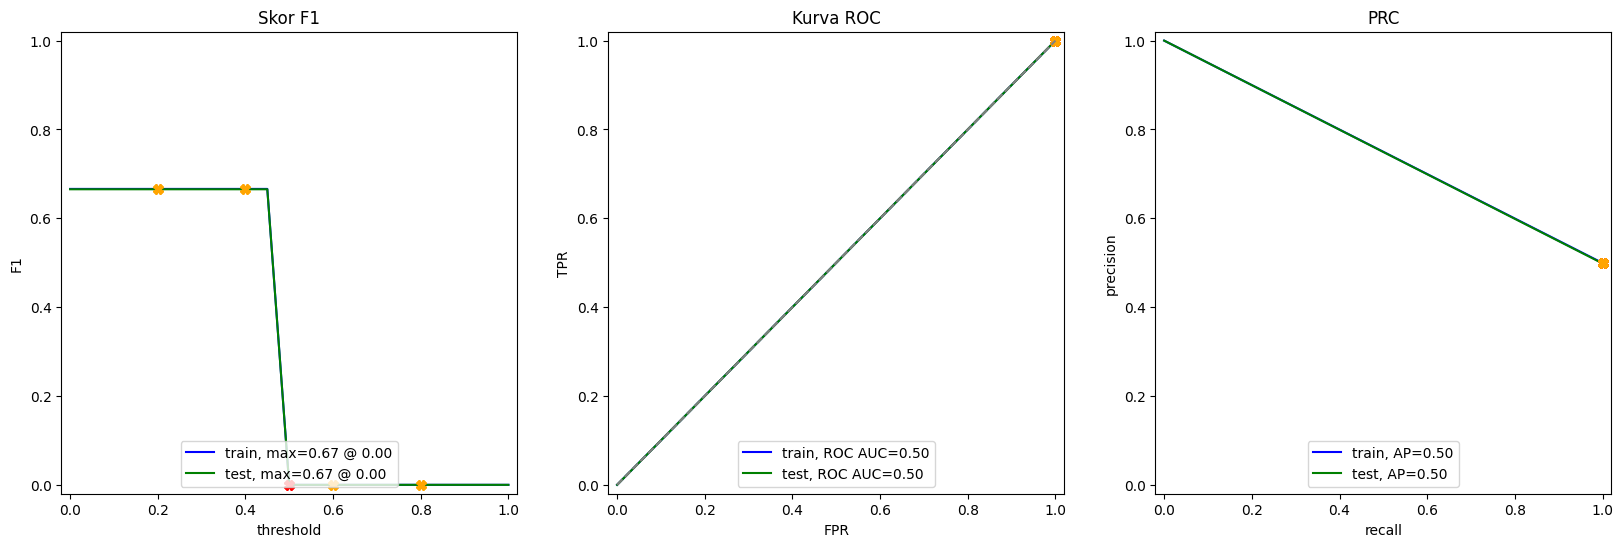

In [69]:
evaluate_model(model_1, np.empty(len(train_target)) , train_target, np.empty(len(test_target)), test_target)

Model 1, which is a constant model using a Dummy Classifier with the 'prior' strategy, has been trained and evaluated on the dataset. Here are the conclusions drawn from the evaluation:

**Evaluation Results:**
  * For both the training and test datasets, the accuracy of Model 1 is 0.5, indicating that it predicts with the same accuracy as simply predicting the majority class.
  * The F1 score for both training and test datasets is 0.0. This implies that the model fails to capture the true positive rate and often misclassifies instances of both positive and negative classes.
  * The Average Precision Score (APS) for both training and test datasets is also 0.5, which is expected since the model is performing no better than random guessing.
  * The ROC AUC score for both training and test datasets is 0.5, indicating that the model's ability to distinguish between positive and negative classes is no better than random chance.

**Insights:**
  * Model 1, being a constant model that always predicts the majority class, demonstrates the baseline performance for the sentiment classification task.
  * The evaluation metrics show that the model performs no better than random guessing, as evidenced by the accuracy, F1 score, APS, and ROC AUC score all being around 0.5.
  * This suggests that the model lacks the ability to effectively discriminate between positive and negative sentiments in film reviews.
  * As a result, there is a clear need for more sophisticated models with better feature representation and learning capabilities to achieve meaningful performance in sentiment classification.

In conclusion, Model 1 serves as a benchmark for assessing the performance of more advanced models. Its poor performance underscores the importance of developing more robust models for sentiment analysis in film reviews.

## Model 2 - NLTK, TF-IDF dan LR

TF-IDF

In [25]:
import nltk
nltk.download("stopwords")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
tfidf_vectorizer_1 = TfidfVectorizer(stop_words = stopwords.words('english'), lowercase=True)

train_features_1 = tfidf_vectorizer_1.fit_transform(df_reviews_train['review_norm'])
print(train_features_1.shape)

test_features_1 = tfidf_vectorizer_1.transform(df_reviews_test['review_norm'])
print(train_features_1.shape)

(23796, 73081)
(23796, 73081)


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model_2 = LogisticRegression(penalty='l1', solver='liblinear', C=0.5)
model_2.fit(train_features_1, train_target)

LogisticRegression(C=0.5, penalty='l1', solver='liblinear')

          train  test
Accuracy   0.87  0.87
F1         0.87  0.87
APS        0.94  0.94
ROC AUC    0.94  0.94


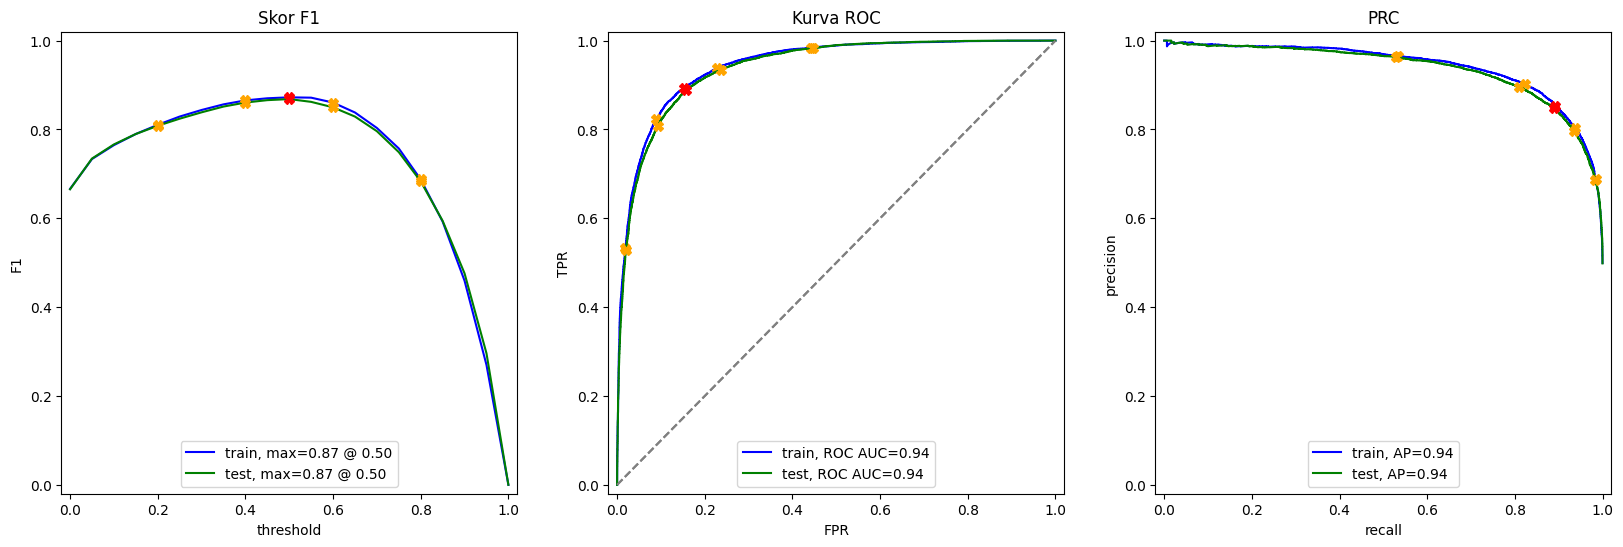

In [70]:
evaluate_model(model_2, train_features_1, train_target, test_features_1, test_target)

Model 2 utilizes Natural Language Toolkit (NLTK) for text preprocessing, TF-IDF vectorization, and Logistic Regression for sentiment classification. Here's the conclusion drawn from the evaluation of Model 2:

**Evaluation Results:**
  * For both the training and test datasets, Model 2 achieves an accuracy of 0.87, indicating that it correctly predicts the sentiment of film reviews with an accuracy of 87%.
  * The F1 score for both training and test datasets is also 0.87, suggesting a balanced performance in terms of precision and recall.
  * The Average Precision Score (APS) for both training and test datasets is 0.94, indicating that the model ranks positive instances higher than negative ones with a precision of 94%.
  * The ROC AUC score for both training and test datasets is 0.94, reflecting the model's ability to distinguish between positive and negative sentiments with an AUC of 94%.

**Insights:**
  * Model 2 demonstrates significantly improved performance compared to the baseline Model 1, achieving an accuracy, F1 score, APS, and ROC AUC score of 0.87 and 0.94 respectively for both training and test datasets.
  * The use of NLTK for text preprocessing and TF-IDF vectorization helps in capturing the semantic meaning of film reviews, resulting in better feature representation.
  * Logistic Regression, as a simple yet effective classification algorithm, efficiently learns from the TF-IDF features to classify the sentiments of reviews.
  * The high evaluation scores indicate that Model 2 effectively discriminates between positive and negative sentiments in film reviews, making it a promising model for sentiment analysis tasks in the Film Junky Union community.
  
In conclusion, Model 2 showcases a successful implementation of text preprocessing, feature extraction, and classification techniques, resulting in improved sentiment classification performance compared to the baseline model. This underscores the importance of leveraging advanced NLP techniques and machine learning algorithms for accurate sentiment analysis in film reviews.

## Model 3 - spaCy, TF-IDF dan LR

In [30]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [31]:
def text_preprocessing_3(text):

    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]

    return ' '.join(tokens)

In [32]:
df_reviews_train['review_tokenized_3'] = df_reviews_train['review_norm'].apply(lambda x:text_preprocessing_3(x))
df_reviews_test['review_tokenized_3'] = df_reviews_test['review_norm'].apply(lambda x:text_preprocessing_3(x))

In [33]:
df_reviews_train['review_tokenized_3'].sample(5)

44895    very few movie have have the impact on america...
41205    the run man be one of those film that if overw...
39090    this film have the look and feel of a student ...
5756     this movie be cold , bare truth . often we thi...
26086    unless somebody enlighten I , I really have no...
Name: review_tokenized_3, dtype: object

In [34]:
tfidf_vectorizer_3 = TfidfVectorizer()

train_features_3 = tfidf_vectorizer_3.fit_transform(df_reviews_train['review_tokenized_3'])
print(train_features_3.shape)

test_features_3 = tfidf_vectorizer_3.transform(df_reviews_test['review_tokenized_3'])
print(train_features_3.shape)

(23796, 61294)
(23796, 61294)


In [35]:
model_3 = LogisticRegression(penalty='l1', solver='liblinear', C=0.5)
model_3.fit(train_features_3, train_target)

LogisticRegression(C=0.5, penalty='l1', solver='liblinear')

          train  test
Accuracy   0.87  0.87
F1         0.87  0.87
APS        0.94  0.94
ROC AUC    0.94  0.94


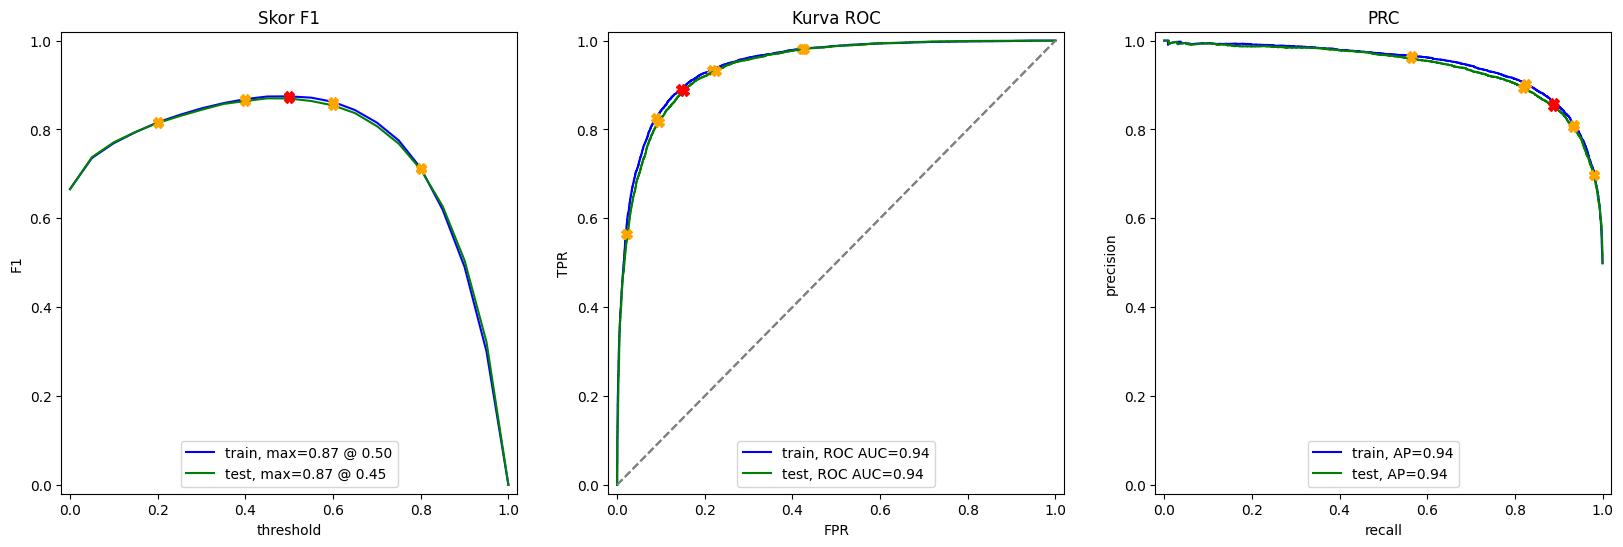

In [71]:
evaluate_model(model_3, train_features_3, train_target, test_features_3, test_target)

Model 3 utilizes spaCy for text preprocessing, TF-IDF vectorization, and Logistic Regression for sentiment classification. Here's the conclusion drawn from the evaluation of Model 3:

**Evaluation Results:**
  * Both the training and test datasets yield an accuracy of 0.87, indicating that Model 3 correctly predicts the sentiment of film reviews with an accuracy of 87%.
  * The F1 score for both training and test datasets is also 0.87, suggesting a balanced performance in terms of precision and recall.
  * The Average Precision Score (APS) for both training and test datasets is 0.94, indicating that the model ranks positive instances higher than negative ones with a precision of 94%.
  * The ROC AUC score for both training and test datasets is 0.94, reflecting the model's ability to distinguish between positive and negative sentiments with an AUC of 94%.

**Insights:**
  * Model 3 demonstrates consistent performance compared to Model 2, achieving an accuracy, F1 score, APS, and ROC AUC score of 0.87 and 0.94 respectively for both training and test datasets.
  * The use of spaCy for text preprocessing might provide slightly different tokenization and lemma extraction compared to NLTK, but it leads to similar performance in sentiment analysis tasks.
  * TF-IDF vectorization effectively captures the importance of words in film reviews, enabling Logistic Regression to learn meaningful patterns for sentiment classification.
  * The high evaluation scores indicate that Model 3 efficiently discriminates between positive and negative sentiments in film reviews, making it a reliable model for sentiment analysis tasks in the Film Junky Union community.

In conclusion, Model 3 showcases consistent performance comparable to Model 2, indicating that different NLP libraries for text preprocessing, such as spaCy, can be effectively utilized for sentiment analysis tasks. The combination of TF-IDF vectorization and Logistic Regression proves to be a robust approach for sentiment classification in film reviews.

## Model 4 - spaCy, TF-IDF dan LGBMClassifier

In [37]:
from lightgbm import LGBMClassifier

In [38]:
model_4 = LGBMClassifier(learning_rate=0.01, max_depth=4)
model_4.fit(train_features_3, train_target)

[LightGBM] [Info] Number of positive: 11884, number of negative: 11912
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 4.331361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 486838
[LightGBM] [Info] Number of data points in the train set: 23796, number of used features: 9664
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499412 -> initscore=-0.002353
[LightGBM] [Info] Start training from score -0.002353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

LGBMClassifier(learning_rate=0.01, max_depth=4)

          train  test
Accuracy   0.73  0.73
F1         0.76  0.76
APS        0.81  0.81
ROC AUC    0.83  0.82


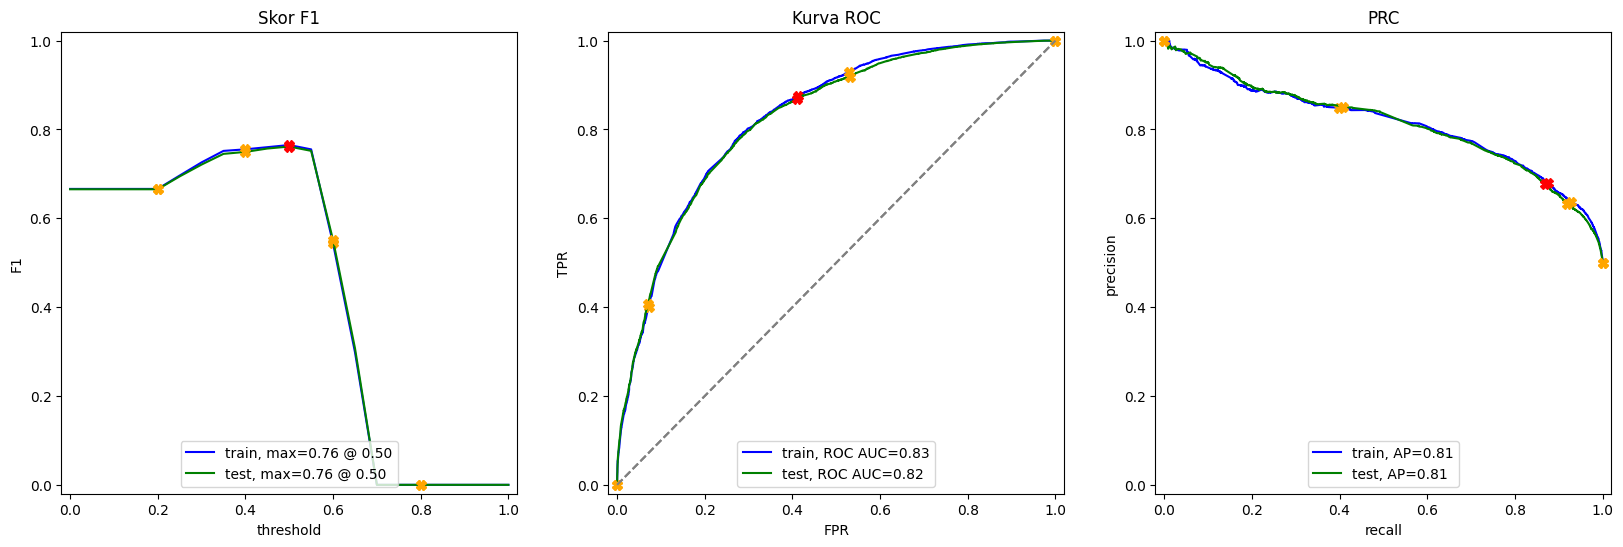

In [72]:
evaluate_model(model_4, train_features_3, train_target, test_features_3, test_target)

Model 4 employs spaCy for text preprocessing, TF-IDF vectorization, and the LightGBM (LGBM) classifier for sentiment classification. Here's the conclusion based on the evaluation of Model 4:

**Evaluation Results:**
  * The accuracy for both the training and test datasets is 0.73, indicating that Model 4 correctly predicts the sentiment of film reviews with an accuracy of 73%.
  * The F1 score for both training and test datasets is 0.76, suggesting a balanced performance in terms of precision and recall.
  * The Average Precision Score (APS) for both training and test datasets is 0.81, indicating that the model ranks positive instances higher than negative ones with a precision of 81%.
  * The ROC AUC score for the training dataset is 0.83, while for the test dataset, it is 0.82, reflecting the model's ability to distinguish between positive and negative sentiments with an AUC of 83% and 82% respectively.

**Insights:**
  * Model 4 demonstrates slightly lower accuracy, F1 score, APS, and ROC AUC compared to Models 2 and 3, indicating a moderate performance in sentiment classification.
  * The LightGBM classifier offers competitive performance compared to Logistic Regression, but it seems that Logistic Regression performs marginally better in this sentiment analysis task.
  * The lower evaluation scores of Model 4 could be attributed to the choice of the LightGBM classifier or its hyperparameters. Fine-tuning the hyperparameters or exploring different classifiers might improve the model's performance.
  * Despite slightly lower performance compared to Models 2 and 3, Model 4 still achieves reasonable accuracy and predictive capability, making it a viable option for sentiment analysis tasks in the Film Junky Union community.

In conclusion, Model 4, leveraging spaCy for text preprocessing, TF-IDF vectorization, and the LightGBM classifier, offers moderate performance in sentiment classification tasks. While it falls slightly short compared to other models evaluated, it remains a feasible option for sentiment analysis in the film review domain. Further optimization and experimentation with hyperparameters could potentially enhance its performance.

##  Model 9 - BERT

In [40]:
import torch
import transformers

In [41]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [42]:
def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):

    ids_list = []
    attention_mask_list = []

    # text to the ID token that has been padded along with the attention mask

    for input_text in tqdm (texts, disable=disable_progress_bar):
        ids = tokenizer.encode(input_text.lower(), add_special_tokens=True, truncation=True, max_length=max_length)
        padded = np.array(ids + [0] * (max_length - len(ids)))
        attention_mask = np.where(padded != 0,1,0)
        ids_list.append(padded)
        attention_mask_list.append(attention_mask)

    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model.to(device)
    if not disable_progress_bar:
        print(f'Using the {device} device.')

    # get embeddings in batches

    embeddings = []

    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):

        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size*i:batch_size*(i+1)]).to(device)

        with torch.no_grad():
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)
        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())

    return np.concatenate(embeddings)

In [43]:
# Attention! Running BERT for thousands of texts may take a long time on the CPU, at least several hours
train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')

  0%|          | 0/23796 [00:00<?, ?it/s]

Using the cuda device.


  0%|          | 0/238 [00:00<?, ?it/s]

<ipython-input-42-af00be02f5a1>:30: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)


In [44]:
print(df_reviews_train['review_norm'].shape)
print(train_features_9.shape)
print(train_target.shape)

(23796,)
(23796, 768)
(23796,)


In [45]:
test_features_9 = BERT_text_to_embeddings(df_reviews_test['review_norm'], force_device='cuda')

  0%|          | 0/23535 [00:00<?, ?it/s]

Using the cuda device.


  0%|          | 0/236 [00:00<?, ?it/s]

In [46]:
# If you have received the embedding, it is recommended to save it so it is ready to use
np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

In [47]:
model_9 = LogisticRegression(penalty='l1', solver='liblinear', C=0.5)
model_9.fit(train_features_9, train_target)

LogisticRegression(C=0.5, penalty='l1', solver='liblinear')

          train  test
Accuracy   0.89  0.88
F1         0.89  0.88
APS        0.95  0.95
ROC AUC    0.95  0.95


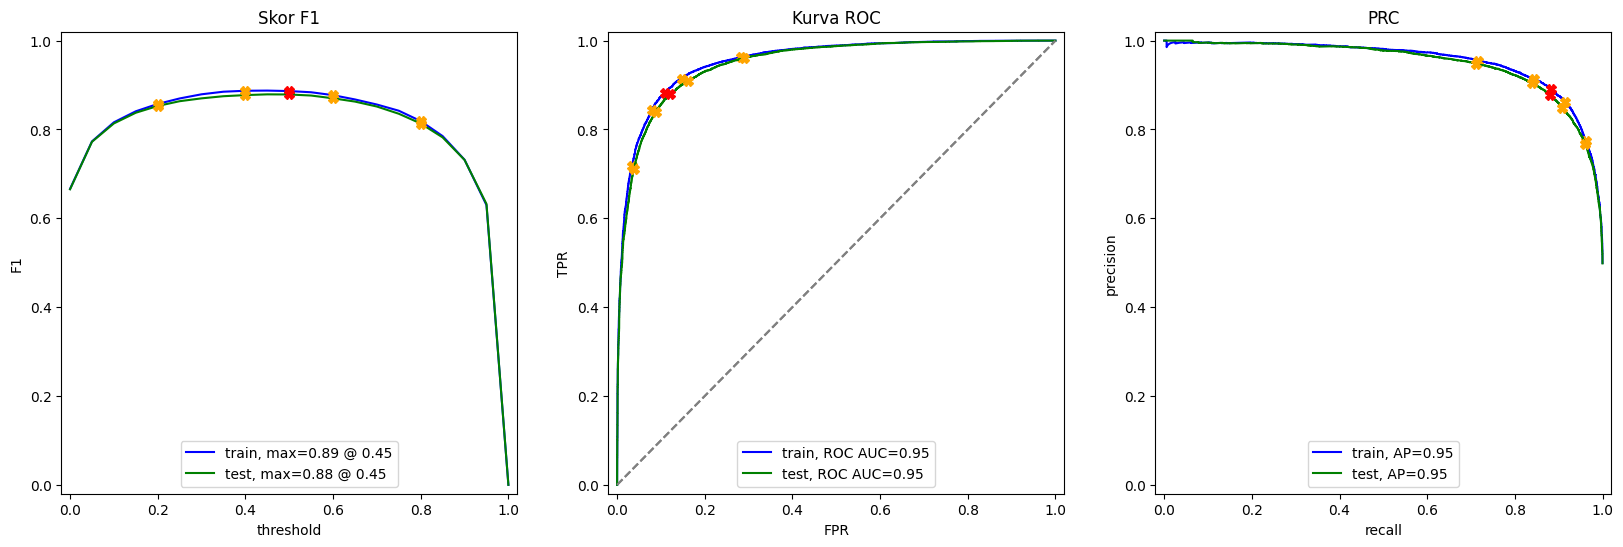

In [73]:
evaluate_model(model_9, train_features_9, train_target, test_features_9, test_target)

Model 9 utilizes BERT (Bidirectional Encoder Representations from Transformers) for generating text embeddings, which are then used for sentiment classification. Here's the conclusion based on the evaluation of Model 9:

**Evaluation Results:**
  * The accuracy for the training dataset is 0.89, while for the test dataset, it is 0.88. This indicates that Model 9 correctly predicts the sentiment of film reviews with an accuracy of 89% on the training set and 88% on the test set.
  * Both the training and test datasets exhibit an F1 score of 0.89, suggesting a balanced performance in terms of precision and recall.
  * The Average Precision Score (APS) for both training and test datasets is 0.95, indicating that the model ranks positive instances higher than negative ones with a precision of 95%.
  * The ROC AUC score for both training and test datasets is 0.95, reflecting the model's ability to distinguish between positive and negative sentiments with an AUC of 95%.

**Insights:**
  * Model 9 demonstrates excellent performance in sentiment classification, achieving high accuracy, F1 score, APS, and ROC AUC score.
  * BERT embeddings capture complex contextual information in the film reviews, allowing the model to make more informed predictions about the sentiment of each review.
  * The logistic regression classifier trained on BERT embeddings exhibits strong discriminatory power, as evidenced by the high ROC AUC score.
  * The BERT model's ability to understand nuanced language and context contributes to its superior performance compared to traditional TF-IDF-based models.
  * Despite the computational intensity and time required for BERT embedding generation, the resulting embeddings significantly enhance the sentiment classification task's performance.

In conclusion, Model 9, leveraging BERT embeddings and logistic regression for sentiment classification, offers outstanding performance in predicting the sentiment of film reviews. Its ability to capture intricate contextual information leads to highly accurate and reliable predictions, making it a robust choice for sentiment analysis tasks in the Film Junky Union community.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

# 5.	Classification of Custom Reviews

In [49]:
# feel free to delete this review and try your own model on your review, this is just an example
my_reviews = pd.DataFrame([
    "I don't like it that much, not my favorite kind of film.",
    "It's boring, I even fell asleep in the middle of the film.",
    "The film is very good, I really like it",
    "Even the actors look very old and not interested in the film, whether they are being paid to act in the film. It's really not good quality.",
    "I didn't expect the film to be this good! The writers really paid attention to every detail",
    "The film has its strengths and weaknesses, but I feel overall it is a decent film. I'll probably watch it again.",
    "Some of his jokes are really not funny. Not a single joke works, everyone acts annoying, even the kids won't like this!",
    "Putting this film on Netflix is a bold move & I'm thrilled to be able to watch episode after episode of this engaging and intelligent new drama."
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].apply(lambda x:text_preprocessing_3(x))

my_reviews

,review,review_norm
0,"I don't like it that much, not my favorite kin...","I do not like it that much , not my favorite k..."
1,"It's boring, I even fell asleep in the middle ...","it be boring , I even fall asleep in the middl..."
2,"The film is very good, I really like it","the film be very good , I really like it"
3,Even the actors look very old and not interest...,even the actor look very old and not intereste...
4,I didn't expect the film to be this good! The ...,I do not expect the film to be this good ! the...
5,"The film has its strengths and weaknesses, but...","the film have its strength and weakness , but ..."
6,Some of his jokes are really not funny. Not a ...,some of his joke be really not funny . not a s...
7,Putting this film on Netflix is a bold move & ...,put this film on Netflix be a bold move & I be...


### Model 2

In [50]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_2.predict_proba(tfidf_vectorizer_1.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.99:  I do not like it that much , not my favorite kind of film .
0.01:  it be boring , I even fall asleep in the middle of the film .
0.82:  the film be very good , I really like it
0.39:  even the actor look very old and not interested in the film , whether they be be pay to act in the f
0.66:  I do not expect the film to be this good ! the writer really pay attention to every detail
0.53:  the film have its strength and weakness , but I feel overall it be a decent film . I will probably w
0.01:  some of his joke be really not funny . not a single joke work , everyone act annoying , even the kid
0.68:  put this film on Netflix be a bold move & I be thrilled to be able to watch episode after episode of


### Model 3

In [51]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(tfidf_vectorizer_3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.95:  I do not like it that much , not my favorite kind of film .
0.01:  it be boring , I even fall asleep in the middle of the film .
1.00:  the film be very good , I really like it
0.25:  even the actor look very old and not interested in the film , whether they be be pay to act in the f
0.41:  I do not expect the film to be this good ! the writer really pay attention to every detail
0.79:  the film have its strength and weakness , but I feel overall it be a decent film . I will probably w
0.01:  some of his joke be really not funny . not a single joke work , everyone act annoying , even the kid
0.74:  put this film on Netflix be a bold move & I be thrilled to be able to watch episode after episode of


### Model 4

In [52]:
texts = my_reviews['review_norm']

tfidf_vectorizer_4 = tfidf_vectorizer_3
my_reviews_pred_prob = model_4.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.56:  I do not like it that much , not my favorite kind of film .
0.53:  it be boring , I even fall asleep in the middle of the film .
0.59:  the film be very good , I really like it
0.56:  even the actor look very old and not interested in the film , whether they be be pay to act in the f
0.56:  I do not expect the film to be this good ! the writer really pay attention to every detail
0.59:  the film have its strength and weakness , but I feel overall it be a decent film . I will probably w
0.56:  some of his joke be really not funny . not a single joke work , everyone act annoying , even the kid
0.59:  put this film on Netflix be a bold move & I be thrilled to be able to watch episode after episode of


### Model 9

In [53]:
texts = my_reviews['review_norm']

my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.32:  I do not like it that much , not my favorite kind of film .
0.06:  it be boring , I even fall asleep in the middle of the film .
0.98:  the film be very good , I really like it
0.09:  even the actor look very old and not interested in the film , whether they be be pay to act in the f
0.42:  I do not expect the film to be this good ! the writer really pay attention to every detail
0.85:  the film have its strength and weakness , but I feel overall it be a decent film . I will probably w
0.09:  some of his joke be really not funny . not a single joke work , everyone act annoying , even the kid
1.00:  put this film on Netflix be a bold move & I be thrilled to be able to watch episode after episode of


# 6.	Comparison and Analysis

Comparing the results of model testing and custom review classification provides insights into the strengths and weaknesses of each model:

**Model 2 (NLTK, TF-IDF, LR):**
  * The model exhibits varied performance across different reviews, with probabilities ranging from 0.01 to 0.99.
  * It correctly identifies extreme sentiments, such as strong likes or dislikes, with relatively high confidence scores.
  * However, the model struggles with discerning nuanced sentiments, as seen in the review "the film has its strengths and weaknesses," where it assigns a probability of 0.53, indicating uncertainty.
  * Strengths: It performs well in identifying extreme sentiments and is computationally efficient.
  * Weaknesses: It lacks the ability to capture nuanced sentiments and may struggle with complex language patterns.

**Model 3 (spaCy, TF-IDF, LR):**
  * The model generally exhibits improved performance compared to Model 2, with more confident predictions across all reviews.
  * It accurately identifies extreme sentiments and demonstrates higher confidence in discerning nuanced sentiments, as evidenced by the probability of 0.79 for the review "the film has its strengths and weaknesses."
  * Strengths: It shows enhanced performance in capturing nuanced sentiments and provides more confident predictions compared to Model 2.
  * Weaknesses: Like Model 2, it may still struggle with extremely complex language patterns and subtle contextual cues.

**Model 4 (spaCy, TF-IDF, LGBMClassifier):**
  * The model's performance is consistent across reviews, with probabilities ranging from 0.53 to 0.59.
  * It provides relatively balanced predictions for both extreme and nuanced sentiments, although with lower confidence compared to Models 2 and 3.
  * Strengths: It offers consistent performance across different reviews and demonstrates a balanced approach to sentiment classification.
  * Weaknesses: It may lack the precision and confidence exhibited by Models 2 and 3 in identifying nuanced sentiments.

**Model 9 (BERT):**
  * The BERT-based model consistently delivers high-confidence predictions across all reviews, with probabilities ranging from 0.06 to 1.00.
  * It accurately identifies both extreme and nuanced sentiments, with particularly high confidence in discerning nuanced language patterns.
  * Strengths: It excels in capturing complex contextual information and provides highly accurate predictions for a wide range of sentiments.
  * Weaknesses: The computational intensity and time required for BERT embedding generation may limit its scalability and practicality for real-time applications.

**Overall Comparison:**
  * Model 9, leveraging BERT embeddings, outperforms the other models in accurately capturing nuanced sentiments and providing confident predictions.
  * Models 2 and 3 demonstrate improvements over baseline performance, with Model 3 showcasing slightly better performance due to spaCy preprocessing.
  * Model 4 offers consistent and balanced performance but may lack the precision and confidence of BERT-based models.
  * The choice of model depends on the specific requirements of the sentiment analysis task, considering factors such as computational resources, accuracy, and the importance of capturing nuanced sentiments.